# Data preparation

In [27]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Data normalization

In [30]:
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

# SGD

In [33]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0]  

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i  
            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            
            y_hat = xi.dot(thetas)
            li = (y_hat - yi) ** 2 / 2
            g_li = y_hat - yi
            gradients = xi.T.dot(g_li)
            thetas = thetas - learning_rate * gradients
            
            thetas_path.append(thetas)
            losses.append(li[0][0])

    return thetas_path, losses

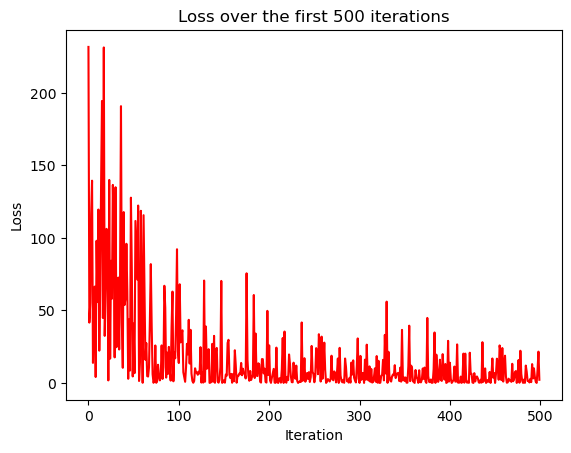

In [37]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(500))  
plt.plot(x_axis, losses[:500], color="r")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over the first 500 iterations')
plt.show()

In [39]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


Q1: b) 6754.64

# Mini-batch GD

In [43]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0] 

    for epoch in range(n_epochs):
        shuffled_indices = np.asarray([
            21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 
            27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 
            22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 
            53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 
            20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127,
            125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 
            194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 
            124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 
            100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129,
            120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 
            168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 
            133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 
            154
        ])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            y_hat = xi.dot(thetas)
            li = (y_hat - yi) ** 2 / 2
            g_li = y_hat - yi
            gradients = xi.T.dot(g_li) / minibatch_size
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)
            loss_mean = np.sum(li) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

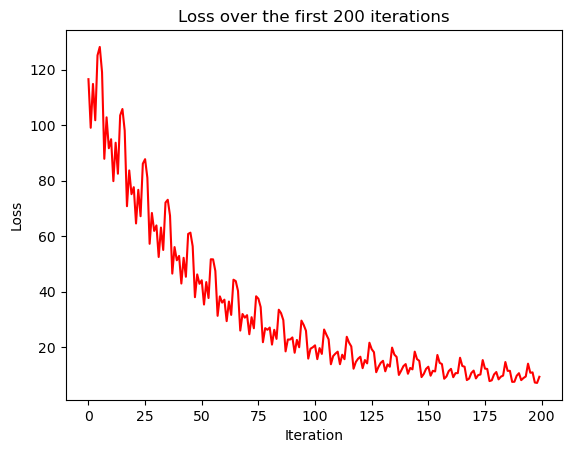

In [45]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
x_axis = list(range(200))  

plt.plot(x_axis, losses[:200], color="r")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over the first 200 iterations')
plt.show()

In [47]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


Q2: d) 8865.65

# Batch GD

In [51]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = X_b.shape[0] 

    for epoch in range(n_epochs):
        y_hat = X_b.dot(thetas)
        li = (y_hat - y) ** 2
        g_li = 2*(y_hat - y)
        gradients = X_b.T.dot(g_li) / N
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)
        mean_loss = np.sum(li) / N
        losses.append(mean_loss)

    return thetas_path, losses

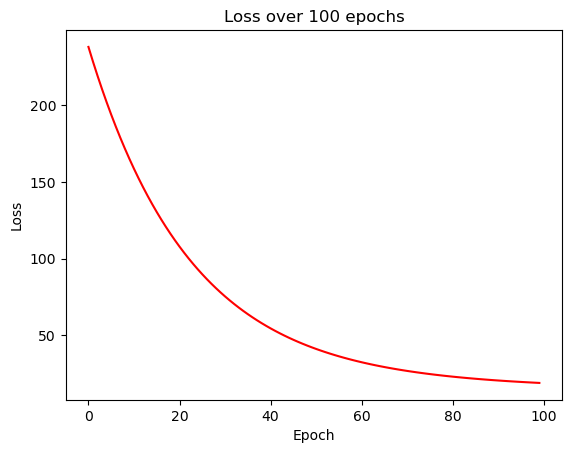

In [53]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100)) 
plt.plot(x_axis, losses[:100], color="r")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over 100 epochs')
plt.show()

In [55]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses), 2))

6716.46


Q3: c) 6716.46